# All Imports Necessary to Classify and Model Data

In [1]:
import pandas as pd
import numpy as np 
import sklearn as sk
import os
import urllib.request
from tabulate import tabulate
import datetime as dt

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from time import time
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.svm import LinearSVC, SVR
from sklearn.cluster import KMeans

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

from scipy import stats
import scipy as sp

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn import decomposition, ensemble

import xgboost
from xgboost.sklearn import XGBRegressor  

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.mlab as mlab

import pyodbc
from sqlalchemy import create_engine

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from collections import Counter
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from gensim.models import CoherenceModel

import category_encoders as ce
import pickle

Using TensorFlow backend.
[nltk_data] Downloading package wordnet to C:\Users\Sahil
[nltk_data]     Surapaneni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Querying Data From Azure SQL Database

In [2]:
#Connection Details
SERVER = 'tx-dot-dev-sqlsvr.database.windows.net'
DATABASE = 'TX-DOT-DEV-DB'
USERNAME = 'sysadmin'
PWD = 'N0ru_Mu5k09a9'
TABLE = "Public_Project_Data"

driver= '{ODBC Driver 17 for SQL Server}'  

In [3]:
connection_string = 'DRIVER=' + driver + \
                    ';SERVER=' + SERVER + \
                    ';PORT=1433' + \
                    ';DATABASE=' + DATABASE + \
                    ';UID=' + USERNAME + \
                    ';PWD=' + PWD

In [4]:
# Converts Data From Database Table to a DataFrame

sql = 'SELECT * FROM [stg].[Analysis_Ready_Data]'
conn = pyodbc.connect(connection_string)
cursor = conn.cursor()
df = pd.read_sql(sql, conn)



In [5]:
pd.to_pickle(df,'df.pkl')

In [6]:
df

,index,county,let_date,type,time,highway,length,check,misc_cost,estimate,bid,over/under,bidder,winning_bidder,date_accessed,id
0,0,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.00,10710570.05,9519743.52,-11.12,"SBBI, INC.","SBBI, INC.",2019-06-21,3055
1,1,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.00,10710570.05,10089270.77,-5.80,"DELHUR INDUSTRIES, INC.","SBBI, INC.",2019-06-21,3055
2,2,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.00,10710570.05,11121238.96,+3.83,"REECE ALBERT, INC.","SBBI, INC.",2019-06-21,3055
3,3,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.00,10710570.05,11698754.12,+9.23,"PRICE CONSTRUCTION, LTD.","SBBI, INC.",2019-06-21,3055
4,4,HOWARD,2015-05-05,"EMB, EXC, STRS, SET, SURF, MBGF",311 WORKING DAYS,FM 846,25.898,100000.0,15000.00,10710570.05,13838689.93,+29.21,"ALLEN BUTLER CONSTRUCTION, INC.","SBBI, INC.",2019-06-21,3055
5,5,TRAVIS,2015-11-03,OPERATIONAL IMPROVEMENTS,1000 WORKING DAYS,IH 35,10.529,100000.0,2021524.11,65621781.44,78833226.74,+20.13,"OHL USA, INC.","OHL USA, INC.",2019-06-21,3001
6,6,TRAVIS,2015-11-03,OPERATIONAL IMPROVEMENTS,1000 WORKING DAYS,IH 35,10.529,100000.0,2021524.11,65621781.44,82858565.59,+26.27,"MCCARTHY BUILDING COMPANIES, INC.","OHL USA, INC.",2019-06-21,3001
7,7,TRAVIS,2015-11-03,OPERATIONAL IMPROVEMENTS,1000 WORKING DAYS,IH 35,10.529,100000.0,2021524.11,65621781.44,89592293.54,+36.53,THE LANE CONSTRUCTION CORPORATION,"OHL USA, INC.",2019-06-21,3001
8,8,DENTON,2015-11-03,WIDEN TWO LAND RURAL TO FOUR LANE URBAN,521 WORKING DAYS,FM 156,6.764,100000.0,500000.00,35709486.60,32541855.74,-8.87,"MARIO SINACOLA & SONS EXCAVATING, INC.","MARIO SINACOLA & SONS EXCAVATING, INC.",2019-06-21,3002
9,9,DENTON,2015-11-03,WIDEN TWO LAND RURAL TO FOUR LANE URBAN,521 WORKING DAYS,FM 156,6.764,100000.0,500000.00,35709486.60,32855213.42,-7.99,"J.D. ABRAMS, L.P.","MARIO SINACOLA & SONS EXCAVATING, INC.",2019-06-21,3002


[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook 05_Data_Preprocessing.ipynb to python
[NbConvertApp] Writing 9103 bytes to 05_Data_Preprocessing.py
[nltk_data] Downloading package stopwords to C:\Users\Sahil
[nltk_data]     Surapaneni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sahil
[nltk_data]     Surapaneni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Files in 'C:\Users\Sahil Surapaneni\Train_Data': ['.ipynb_checkpoints', '01_Raw_Data_Retrieval.ipynb', '02_Raw_Data_Update.ipynb', '03-Staging_Data_Exploration.ipynb', '04_Bid&Winner_Prediction_Model.ipynb', '04_Data_Preprocessing.py', '05_Data_Preprocessing.ipynb', '05_Data_Preprocessing.py', '06-TXDOT_Data_Analysis_and_Modeling_Markdown.ipynb', 'df.pkl', 'df_info.pkl', 'estimate_distance_model.sav', 'orig_df.pkl', 'Pictures', 'win_distance_model.sav']


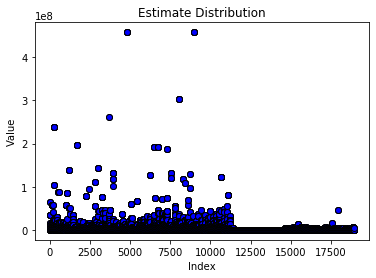

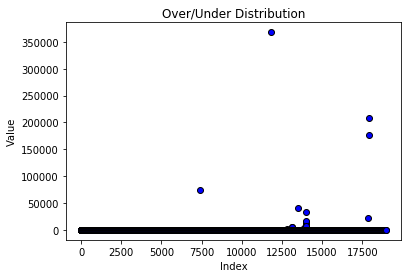

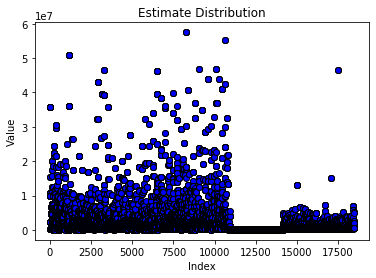

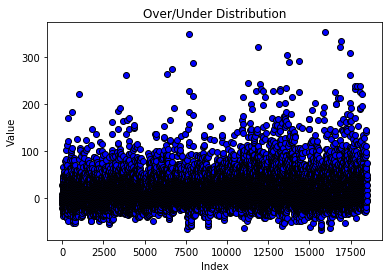

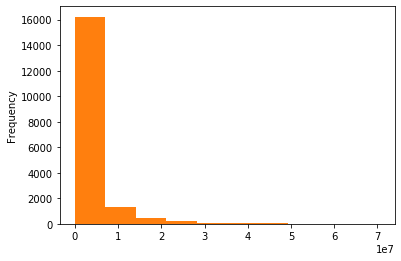

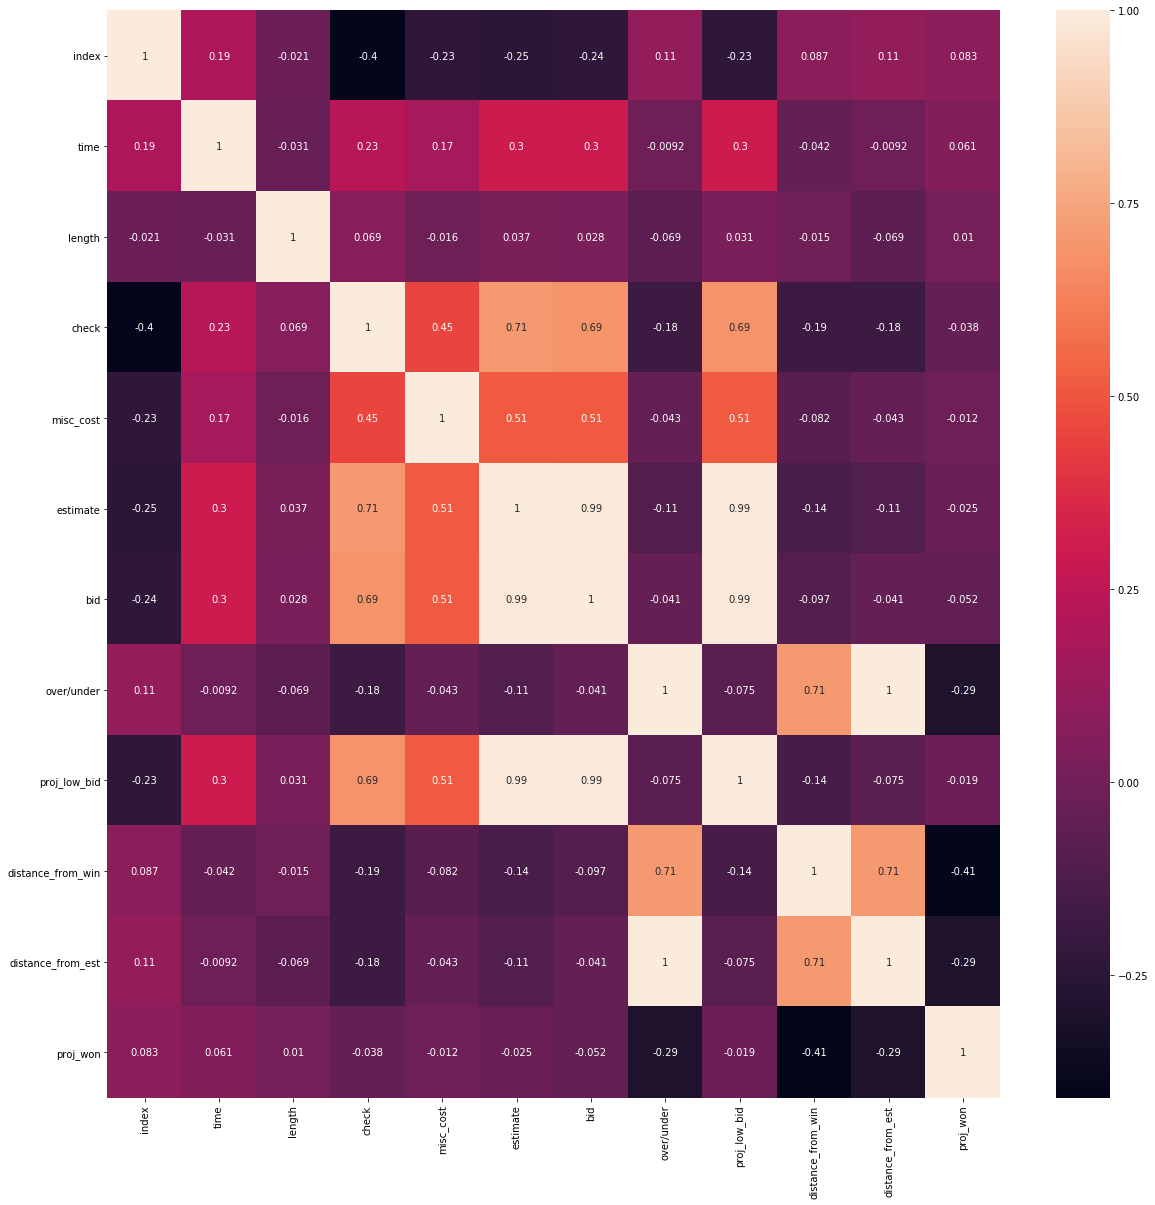

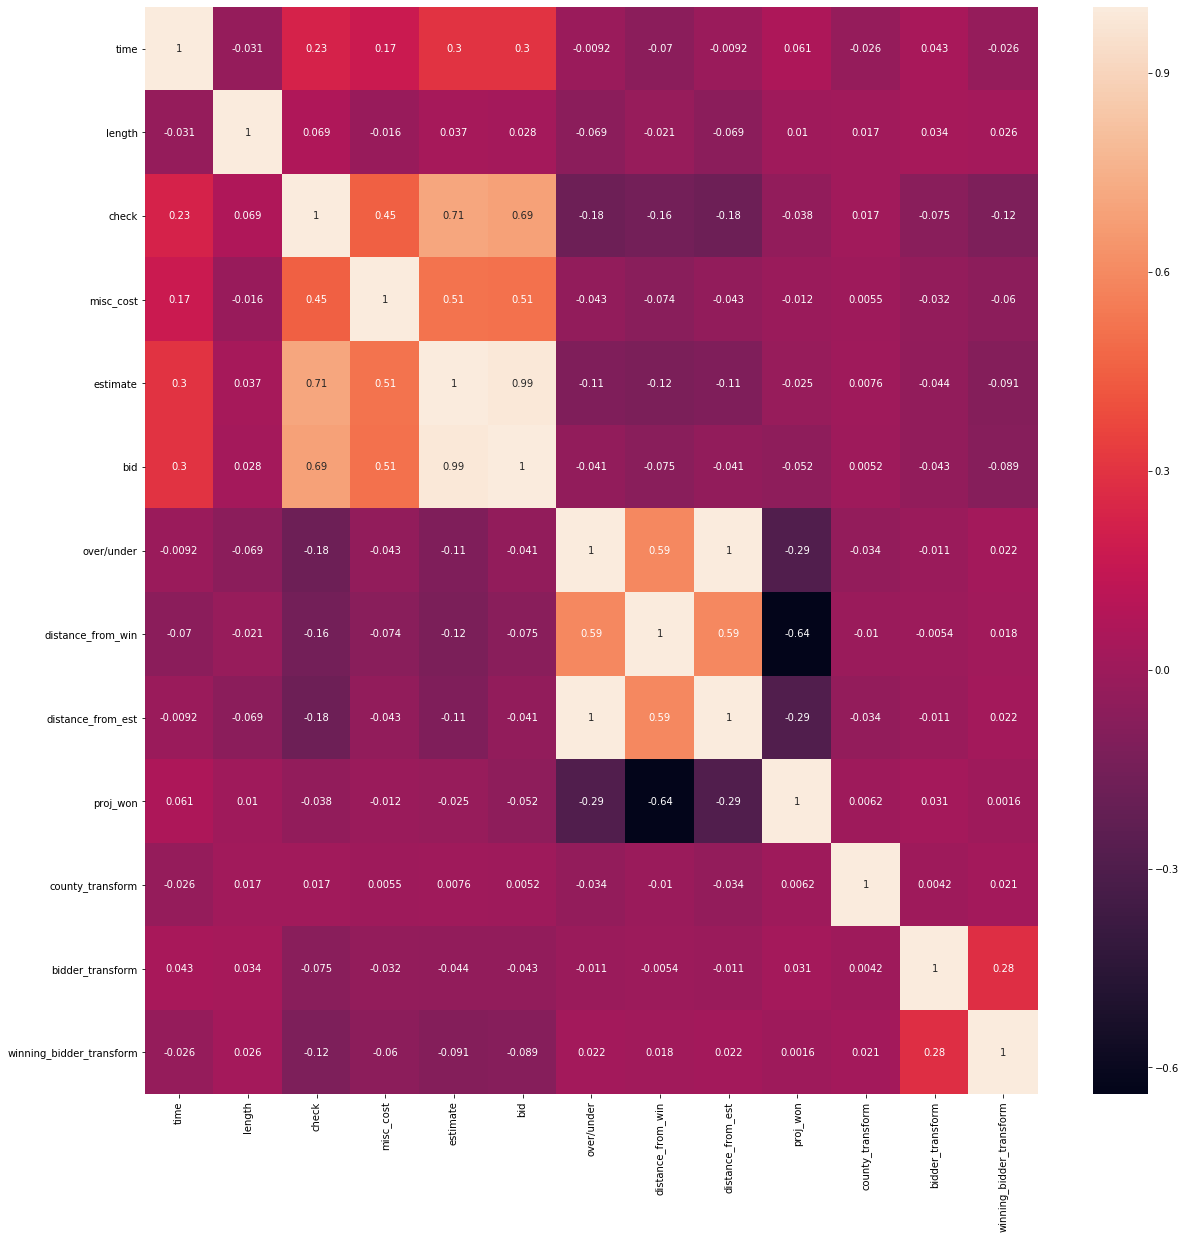

In [7]:
!ipython nbconvert --to python 05_Data_Preprocessing.ipynb
if __name__ == '__main__':
    %run 05_Data_Preprocessing

In [8]:
df = pd.read_pickle('df.pkl')
df_info = pd.read_pickle('df_info.pkl')

In [9]:
print(len(df))
print(len(df_info))

18474
18474


In [10]:
#Tokenizing text
def pre_processor(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(WordNetLemmatizer().lemmatize(token, pos='v'))
    return result


# Creating LDA Text Classification Model using Gensim Library

In [11]:
#Getting tokenized topics
topics = df['type_stem'].apply(pre_processor)

#Creating dictionary for topics
topic_dict = gensim.corpora.Dictionary(topics)
word_freq = [topic_dict.doc2bow(topic) for topic in topics]
tfidf = models.TfidfModel(word_freq)
corpus_tfidf = tfidf[word_freq]
optimum_num_topics = 32
# Creating LDA Model
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=optimum_num_topics, id2word=topic_dict, passes=2, workers=4)
# lda_model_tfidf.save('LDA MODEL')



print(topics)

W0720 15:29:22.017675 17176 ldamulticore.py:248] too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


0                                   [surf, mbgf]
1                                   [surf, mbgf]
2                                   [surf, mbgf]
3                                   [surf, mbgf]
4                                   [surf, mbgf]
5        [widen, land, rural, four, lane, urban]
6        [widen, land, rural, four, lane, urban]
7        [widen, land, rural, four, lane, urban]
8        [widen, land, rural, four, lane, urban]
9        [widen, land, rural, four, lane, urban]
10       [widen, land, rural, four, lane, urban]
11       [widen, land, rural, four, lane, urban]
12                                    [sealcoat]
13                                    [sealcoat]
14                                    [sealcoat]
15                  [pavement, structur, safeti]
16                  [pavement, structur, safeti]
17                  [pavement, structur, safeti]
18                       [safeti, treat, object]
19                       [safeti, treat, object]
20                  

In [12]:
dom_topic = []
perc_contr = []
for i in range(len(word_freq)):
    #Sorting by most contributed topic
    feature = sorted(lda_model_tfidf.get_document_topics(word_freq[i], minimum_probability=0.0), key=lambda x: (x[1]), reverse=True)[0]
    dom_topic.append(int(feature[0]))
    perc_contr.append(round(feature[1],4))

In [13]:
df['dominant_topic_type'] = dom_topic
df['perc_contr_type'] = perc_contr

df = df.drop(['type_stem'],axis=1)

In [14]:
# params = urllib.parse.quote_plus(connection_string)
# engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params,fast_executemany=True)

# TABLE_CLASS = "Classified_Data"
# df.to_sql(TABLE_CLASS, engine, if_exists='replace',schema='rpt')


In [15]:
df['bidder'] = df['bidder_transform']
df['county'] = df['county_transform']
df['winning_bidder'] = df['winning_bidder_transform']
df = df.drop(['bidder_transform','county_transform','winning_bidder_transform','type'],axis=1)

In [16]:
df

,county,time,length,check,misc_cost,estimate,bid,bidder,winning_bidder,id,over/under,distance_from_win,distance_from_est,proj_won,dominant_topic_type,perc_contr_type
0,112,311,25.898,100000.0,15000.00,10710570.05,9519743,551,551,305520150505,-11.12,0,-0.111182,1,1,0.6771
1,112,311,25.898,100000.0,15000.00,10710570.05,10089270,174,551,305520150505,-5.80,2229,-0.058008,0,1,0.6771
2,112,311,25.898,100000.0,15000.00,10710570.05,11121238,516,551,305520150505,3.83,6050,0.038342,0,1,0.6771
3,112,311,25.898,100000.0,15000.00,10710570.05,11698754,491,551,305520150505,9.23,7687,0.092262,0,1,0.6771
4,112,311,25.898,100000.0,15000.00,10710570.05,13838689,29,551,305520150505,29.21,11200,0.292059,0,1,0.6771
5,60,521,6.764,100000.0,500000.00,35709486.60,32541855,415,415,300220151103,-8.87,0,-0.088706,1,4,0.5927
6,60,521,6.764,100000.0,500000.00,35709486.60,32855213,316,415,300220151103,-7.99,318,-0.079930,0,4,0.5918
7,60,521,6.764,100000.0,500000.00,35709486.60,33492686,278,415,300220151103,-6.21,1048,-0.062079,0,4,0.5938
8,60,521,6.764,100000.0,500000.00,35709486.60,33630835,58,415,300220151103,-5.82,1213,-0.058210,0,4,0.5933
9,60,521,6.764,100000.0,500000.00,35709486.60,33869722,421,415,300220151103,-5.15,1486,-0.051520,0,4,0.5943


# Data Splitting

In [17]:
# train_df ,test_df = train_test_split(df,test_size=0.25)
# test_df = test_df.reset_index(drop=True)

#Non random split to show how data can be used one specific projects
# x = int(len(df)*.75)
# train_df = df[:x]
# test_df = df[x:]
# train_df_info = df_info[:x]
# test_df_info = df_info[x:]

In [18]:
# print(train_df.shape)
# test_df.shape

In [19]:
target_win = df['distance_from_win']
features_win = df.drop(['distance_from_est','distance_from_win','perc_contr_type','id'],axis = 1)

target_bid = df['distance_from_est']
features_bid = df.drop(['distance_from_est','distance_from_win','perc_contr_type','id','bid','over/under','proj_won'],axis = 1)

In [20]:
# target_win = train_df['distance_from_win']
# features_win = train_df.drop(['distance_from_est','distance_from_win','perc_contr_type','id'],axis = 1)

# target_bid = train_df['distance_from_est']
# features_bid = train_df.drop(['distance_from_est','distance_from_win','perc_contr_type','id','bid','over/under','proj_won'],axis = 1)


In [21]:
features_win

,county,time,length,check,misc_cost,estimate,bid,bidder,winning_bidder,over/under,proj_won,dominant_topic_type
0,112,311,25.898,100000.0,15000.00,10710570.05,9519743,551,551,-11.12,1,1
1,112,311,25.898,100000.0,15000.00,10710570.05,10089270,174,551,-5.80,0,1
2,112,311,25.898,100000.0,15000.00,10710570.05,11121238,516,551,3.83,0,1
3,112,311,25.898,100000.0,15000.00,10710570.05,11698754,491,551,9.23,0,1
4,112,311,25.898,100000.0,15000.00,10710570.05,13838689,29,551,29.21,0,1
5,60,521,6.764,100000.0,500000.00,35709486.60,32541855,415,415,-8.87,1,4
6,60,521,6.764,100000.0,500000.00,35709486.60,32855213,316,415,-7.99,0,4
7,60,521,6.764,100000.0,500000.00,35709486.60,33492686,278,415,-6.21,0,4
8,60,521,6.764,100000.0,500000.00,35709486.60,33630835,58,415,-5.82,0,4
9,60,521,6.764,100000.0,500000.00,35709486.60,33869722,421,415,-5.15,0,4


In [22]:
# test_ftr_win = test_df.drop(['distance_from_est','distance_from_win','perc_contr_type','id'],axis = 1)
# test_trg_win = test_df['distance_from_win']

# test_ftr_bid = test_df.drop(['distance_from_est','distance_from_win','perc_contr_type','id','bid','over/under','proj_won'],axis = 1)
# test_trg_bid = test_df['distance_from_est']

#### All Tested Algorithms

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
algorithms = [
    XGBRegressor(),
    LinearRegression(),
    #SVC(probability=True, gamma = 'auto'),
    SGDRegressor(),
    #RandomForestClassifier(),
    #GradientBoostingClassifier(),
    #GaussianNB(),
    DecisionTreeRegressor(),
    SVR()
]

In [37]:
for clf in classifiers:
    prediction_win = cross_val_predict(clf,features_win,target_win)
    prediction_bid = cross_val_predict(clf,features_bid,target_bid)
    count = 0
    diff = 0
    total_trg = 0
    total_pred = 0
    for i,j in zip(prediction_win,target_win):
        count+=1
        diff+=abs(i-j)
        total_trg+=j
        total_pred+=i
    print(tabulate([[clf.__class__.__name__,(diff/count)/(total_trg/count) * 100,diff,total_trg/count,total_pred/count]], headers=['Model Name','MAPE', 'Total Difference', 'Average DFW','Average Predicted DFW'],numalign="right",tablefmt="fancy_grid"))
    count = 0
    diff = 0
    total_trg = 0
    total_pred = 0
    for i,j in zip(prediction_bid,target_bid):
        count+=1
        diff+=abs(i-j)
        total_trg+=j
        total_pred+=i
    print(tabulate([[clf.__class__.__name__,(diff/count)/(total_trg/count) * 100,diff,total_trg/count,total_pred/count]], headers=['Model Name','MAPE', 'Total Difference', 'Average DFE','Average Predicted DFE'],numalign="right",tablefmt="fancy_grid"))

[15:43:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:43:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:43:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:43:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:43:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:43:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
╒══════════════╤

In [ ]:
df
df_info

# Winning Bidder Model

In [ ]:
# params = { 
#     "n_enumerators": [1,3,5,7,9],
#     "n_estimators": [150, 200,250,300,350],
#     "max_depth": [2, 4, 6, 8,10],
#     "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
#     "colsample_bytree": [0.3, 0.5, 0.7, 0.9, 1.0],
#     "subsample":[0.3, 0.5, 0.7, 0.9, 1.0],
#          }

# n_iter_search = 20
# random_search = RandomizedSearchCV(clf, param_distributions=params,
#                                     n_iter=n_iter_search, cv=5, iid=False)

# start = time()
# model_win = random_search.fit(features_win,target_win)
# print(clf.__class__.__name__ + 'took ' + str(time()-start) + ' seconds')
# print(random_search.best_params_)
# print(random_search.best_score_)

# start = time()
# model_bid = random_search.fit(features_bid,target_bid)
# print(clf.__class__.__name__ + 'took ' + str(time()-start) + ' seconds')
# print(random_search.best_params_)
# print(random_search.best_score_)



# optimal_win = XGBRegressor(n_jobs = 5,n_enumerators = 5,max_depth = 4, learning_rate= 0.05, n_estimators = 300)
# optimal_bid = XGBRegressor(subsample= 0.9, n_estimators= 350, n_enumerators= 7, max_depth= 2, learning_rate= 0.05, colsample_bytree = 0.7)



In [39]:
clf = XGBRegressor(n_jobs = 5,n_enumerators = 5,max_depth = 4, learning_rate= 0.05, n_estimators = 300)
# prediction = model_win.predict(test_ftr_win)
prediction = cross_val_predict(clf,features_win,target_win)

count = 0
diff = 0
total_trg = 0
total_pred = 0
for i,j in zip(prediction,target_win):
    count+=1
    diff+=abs(i-j)
    total_trg+=j
    total_pred+=i
print(tabulate([[(diff/count)/(total_trg/count) * 100,diff,total_trg,total_pred]], headers=['MAPE', 'Total Difference', 'Total Actual Bid','Total Predicted Bid'],numalign="right",tablefmt="fancy_grid"))
# count = 0
# diff = 0
# total = 0
# for i,j in zip(prediction,test_trg_win):
#     count+=1
#     diff+=abs(i-j)
#     total+=j
# print('MAPE: ' + str((diff/count)/(total/count) * 100))
# print("Cross Val: " + str(cross_val_score(clf, features_win, target_win, cv=5))) 

# filename = 'win_distance_model.sav'
# pickle.dump(model_win, open(filename, 'wb'))

[16:06:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:06:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
╒═════════╤════════════════════╤════════════════════╤═══════════════════════╕
│    MAPE │   Total Difference │   Total Actual Bid │   Total Predicted Bid │
╞═════════╪════════════════════╪════════════════════╪═══════════════════════╡
│ 36.7298 │         3.5778e+07 │           97408696 │           9.55439e+07 │
╘═════════╧════════════════════╧════════════════════╧═══════════════════════╛


In [40]:
# tmp_df = test_df
tmp_df = df
tmp_df = tmp_df.set_index('id')

tmp_df['prediction_win'] = prediction
tmp_df['diff_win'] = (tmp_df['prediction_win'] - tmp_df['distance_from_win'])
tmp_df['low_pred_win'] = tmp_df.groupby('id')['prediction_win'].agg([pd.np.min])

listn = []
for index,row in tmp_df.iterrows():
    if str(row['prediction_win']) == (str(row['low_pred_win'])):
        listn.append(1)
    else:
        listn.append(0)
        
tmp_df['proj_won_prd'] = listn
count = 0
for i,j in zip(tmp_df['proj_won_prd'],tmp_df['proj_won']):
    if(j == 1):
        if i == j:
            count+=1
print(tabulate([[count,(tmp_df['proj_won'] == 1).sum(),count/(tmp_df['proj_won'] == 1).sum() * 100]], headers=["Number of Correct Predictions", 'Number of Projects', '% of Winning Bidder Correctly Predicted'],numalign="right",tablefmt="fancy_grid"))        
# print("Number of Correct Predictions" + str(count))
# print("Number of Projects: " + str((tmp_df['proj_won'] == 1).sum()))
# print("% of Winning Bidder Correctly Predicted "+ str(count/(tmp_df['proj_won'] == 1).sum() * 100))

╒═════════════════════════════════╤══════════════════════╤═══════════════════════════════════════════╕
│   Number of Correct Predictions │   Number of Projects │   % of Winning Bidder Correctly Predicted │
╞═════════════════════════════════╪══════════════════════╪═══════════════════════════════════════════╡
│                            4218 │                 4269 │                                   98.8053 │
╘═════════════════════════════════╧══════════════════════╧═══════════════════════════════════════════╛


In [41]:
(tmp_df['proj_won'] == 1).sum()

4269

# Bid Prediction Model

In [42]:
clf = XGBRegressor(subsample= 0.9, n_estimators= 350, n_enumerators= 7, max_depth= 2, learning_rate= 0.05, colsample_bytree = 0.7)
# model_bid = clf.fit(features_bid,target_bid)
# prediction_bid = model_bid.predict(pd.DataFrame(test_ftr_bid))
prediction_bid = cross_val_predict(clf,features_bid,target_bid)
count = 0
diff = 0
total_trg = 0
total_pred =0
for i,j in zip(prediction_bid,target_bid):
    count+=1
    diff+=abs(i-j)
    total_trg+=abs(j)
    total_pred +=abs(i)
print(tabulate([[(diff/count)/(total_trg/count) * 100,diff,total_trg,total_pred]], headers=['MAPE', 'Total Differemce', 'Total Actual Bid','Total Predicted Bid'],numalign="right",tablefmt="fancy_grid"))
# print("Cross Val: " + str(cross_val_score(clf, features_bid, target_bid, cv=5))) 

# filename = 'estimate_distance_model.sav'
# pickle.dump(model_bid, open(filename, 'wb'))

[16:15:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:15:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
╒═════════╤════════════════════╤════════════════════╤═══════════════════════╕
│    MAPE │   Total Differemce │   Total Actual Bid │   Total Predicted Bid │
╞═════════╪════════════════════╪════════════════════╪═══════════════════════╡
│ 94.8571 │            3877.18 │            4087.39 │                2874.6 │
╘═════════╧════════════════════╧════════════════════╧═══════════════════════╛


In [43]:
# model_bid.get_booster().get_score(importance_type='weight')
tmp_df = tmp_df.reset_index()
df_info

,county,type,bidder,winning_bidder,let_date,estimate,bid
0,HOWARD,"EMB, EXC, STRS, SET, SURF, MBGF","SBBI, INC.","SBBI, INC.",2015-05-05,10710570.05,9519743
1,HOWARD,"EMB, EXC, STRS, SET, SURF, MBGF","DELHUR INDUSTRIES, INC.","SBBI, INC.",2015-05-05,10710570.05,10089270
2,HOWARD,"EMB, EXC, STRS, SET, SURF, MBGF","REECE ALBERT, INC.","SBBI, INC.",2015-05-05,10710570.05,11121238
3,HOWARD,"EMB, EXC, STRS, SET, SURF, MBGF","PRICE CONSTRUCTION, LTD.","SBBI, INC.",2015-05-05,10710570.05,11698754
4,HOWARD,"EMB, EXC, STRS, SET, SURF, MBGF","ALLEN BUTLER CONSTRUCTION, INC.","SBBI, INC.",2015-05-05,10710570.05,13838689
5,DENTON,WIDEN TWO LAND RURAL TO FOUR LANE URBAN,"MARIO SINACOLA & SONS EXCAVATING, INC.","MARIO SINACOLA & SONS EXCAVATING, INC.",2015-11-03,35709486.60,32541855
6,DENTON,WIDEN TWO LAND RURAL TO FOUR LANE URBAN,"J.D. ABRAMS, L.P.","MARIO SINACOLA & SONS EXCAVATING, INC.",2015-11-03,35709486.60,32855213
7,DENTON,WIDEN TWO LAND RURAL TO FOUR LANE URBAN,"HAYDON CENTRAL, LLC","MARIO SINACOLA & SONS EXCAVATING, INC.",2015-11-03,35709486.60,33492686
8,DENTON,WIDEN TWO LAND RURAL TO FOUR LANE URBAN,"AUSTIN BRIDGE & ROAD SERVICES, LP","MARIO SINACOLA & SONS EXCAVATING, INC.",2015-11-03,35709486.60,33630835
9,DENTON,WIDEN TWO LAND RURAL TO FOUR LANE URBAN,MCM,"MARIO SINACOLA & SONS EXCAVATING, INC.",2015-11-03,35709486.60,33869722


In [50]:
tmp_df['prediction_bid'] = prediction_bid
tmp_df['perc_off_bid'] = (tmp_df['prediction_bid'] - tmp_df['distance_from_est'])

tmp_df['pred_bid'] = round((tmp_df['prediction_bid'] * tmp_df['estimate']  + tmp_df['estimate']).astype(np.float64),3)

In [51]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [60]:
mean_absolute_percentage_error(tmp_df['pred_bid'],tmp_df['bid'])
print(tabulate([[mean_absolute_percentage_error(tmp_df['pred_bid'],tmp_df['bid'])]], headers=['MAPE'],numalign="right",tablefmt="fancy_grid"))

╒═════════╕
│    MAPE │
╞═════════╡
│ 18.0307 │
╘═════════╛


In [63]:
tmp_df[['prediction_win','diff_win','low_pred_win','proj_won_prd','prediction_bid','perc_off_bid','pred_bid']].head(n=5)

,prediction_win,diff_win,low_pred_win,proj_won_prd,prediction_bid,perc_off_bid,pred_bid
0,-134.172379,-134.172379,-134.172379,1,0.099006,0.210189,1.177098e+07
1,2231.347656,2.347656,-134.172379,0,0.164678,0.222686,1.247436e+07
2,2880.098389,-3169.901611,-134.172379,0,0.101205,0.062863,1.179454e+07
3,3218.691162,-4468.308594,-134.172379,0,0.101205,0.008943,1.179454e+07
4,6761.733887,-4438.266113,-134.172379,0,0.169106,-0.122953,1.252179e+07


In [ ]:
tmp_df['type'] = 0
tmp_df['let_date'] = 0

In [ ]:
# test_df_info = test_df_info.reset_index()
df_info['county'].astype(str)

In [ ]:
# tmp_df['county'] = test_df_info['county'].map(str)
# tmp_df['bidder'] = test_df_info['bidder'].map(str)
# tmp_df['type'] = test_df_info['type'].map(str)
# tmp_df['winning_bidder'] = test_df_info['winning_bidder'].map(str)
# tmp_df['let_date'] = pd.to_datetime(test_df_info['let_date'])

tmp_df['county'] = df_info['county'].map(str)
tmp_df['bidder'] = df_info['bidder'].map(str)
tmp_df['type'] = df_info['type'].map(str)
tmp_df['winning_bidder'] = df_info['winning_bidder'].map(str)
tmp_df['let_date'] = pd.to_datetime(df_info['let_date'])

In [ ]:
tmp_df

In [ ]:
bins = np.linspace(tmp_df['estimate'].min(), tmp_df['estimate'].max(), 10)
digitized = np.digitize(df['estimate'], bins)

outputs = []
for i in range(len(bins)):
    if i==0:
        outputs.append('Less Than '+str(bins[i]))
    if i==len(bins)-1:
        outputs.append('Greater Than '+str(bins[i]))
    else:
        outputs.append('Greater Than '+str(bins[i-1])+'Less Than '+str(bins[i]))

In [ ]:
temp = pd.qcut(tmp_df['estimate'], 6).astype('str')
tmp_df['estimate_group'] = temp

In [ ]:
tmp_df

In [ ]:
SERVER = 'tx-dot-dev-sqlsvr.database.windows.net'
DATABASE = 'TX-DOT-DEV-DB'
USERNAME = 'sysadmin'
PWD = 'N0ru_Mu5k09a9'
TABLE_BID = "Prediction_Data"

driver= '{ODBC Driver 17 for SQL Server}'  

connection_string = 'DRIVER=' + driver + \
                    ';SERVER=' + SERVER + \
                    ';PORT=1433' + \
                    ';DATABASE=' + DATABASE + \
                    ';UID=' + USERNAME + \
                    ';PWD=' + PWD

params = urllib.parse.quote_plus(connection_string)
engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params,fast_executemany=True)

tmp_df.to_sql(TABLE_BID, engine, if_exists='replace',schema='rpt')
